UVP SEMINARSKA NALOGA - LINA ČIŽMAN

ANALIZA PREHRANSKIH DODATKOV NA SPLETNI STRANI FUTUNATURA

Pripravila sem seminarsko nalogo, v kateri sem analizirala prehranske dodatke, ki so na voljo na spletni strani Futunatura. Ker je na spletni strani več kategorij sem se odločila, da svojo analizo omejim na eno podkategorijo. Odločila sem se za podkategorijo Športa, ki mi je osebno najbljižje.
V tej podkategoriji mi je uspelo pridobiti podatke o 646 različnih izdelkih 6 atributov. Vsak izdelek vsebuje podatke o imenu, znamki proizvajalca, količini, ceni, originalni ceni in popustu (če je izdelek na razprodaji) ter o prednostih izdelka(to je tabela ki vsebuje 3 prednosti izdelka). V podatkih je največji problem v tem da je količina določena na nestandarden način. enkrat v gramih, drugič v številu kapsul spet tretjič pa kot število enot x količina in podobno. Precej ne standardiziran je tudi zapis prednosti izdelka. na primer če sta dva izdelka namenjena za hidracijo bo pri enem pisalo podpora hidraciji pri drugem pa napitek za več energije. Iz tega razloga je združevanje podatkov v skupine po teh parametrih precej oteženo. 
Pri analizi sem poizkušala poiskati zanimive vzorce v podatkih in jih prikazati na čim boljši način v obliki grafikonov in drugih vizualizacije ki sem jih kreirala s pomočjo knjižnic kot so pandas in matplotlib. 

Najprej sem ugotvila analizirala število ponudnikov športnih prehranskih dodatkov na spletni strani futunatura in pa to kateri ponudniki so v povprečju dražji in kateri cenejši. v spodnji tabeli lahko vidimo seznam posameznih ponudnikov in pa povprečno ceno izdelkov ki jih trenutno ponujajo na spletni strani. 10 najdražjih in 10 najcenejših ponudnikov sem nato prikazala še s pomočjo stolpičnega diagrama. Kot lahko vidimo na rezultatih spodaj je razlika med povprečno ceno najdražjega in najcenejšega ponudnika kar velika in znaša 42,58 eur.

NAJDRAŽJI PONUDNIKI
ALIVER Nutraceutics: 45.99€
Ekolife Natura: 34.99€
Activevital: 34.99€
OnEnergy: 31.19€
Erefit®: 30.74€
HealthyWorld®: 30.05€
ProFuel: 26.64€
Focus Supplements: 25.32€
Annabis: 24.74€
Vita World: 24.17€
--------------------------------
NAJCENEJŠI PONUDNIKI
Diet Food: 13.32€
Genius Nutrition: 12.91€
Allgäuer: 11.99€
QNT: 11.45€
Dragon Superfoods: 10.99€
Virde: 10.68€
NatVita: 9.32€
ActivLab: 8.58€
WUNDmed: 6.99€
Smart Organic: 3.41€


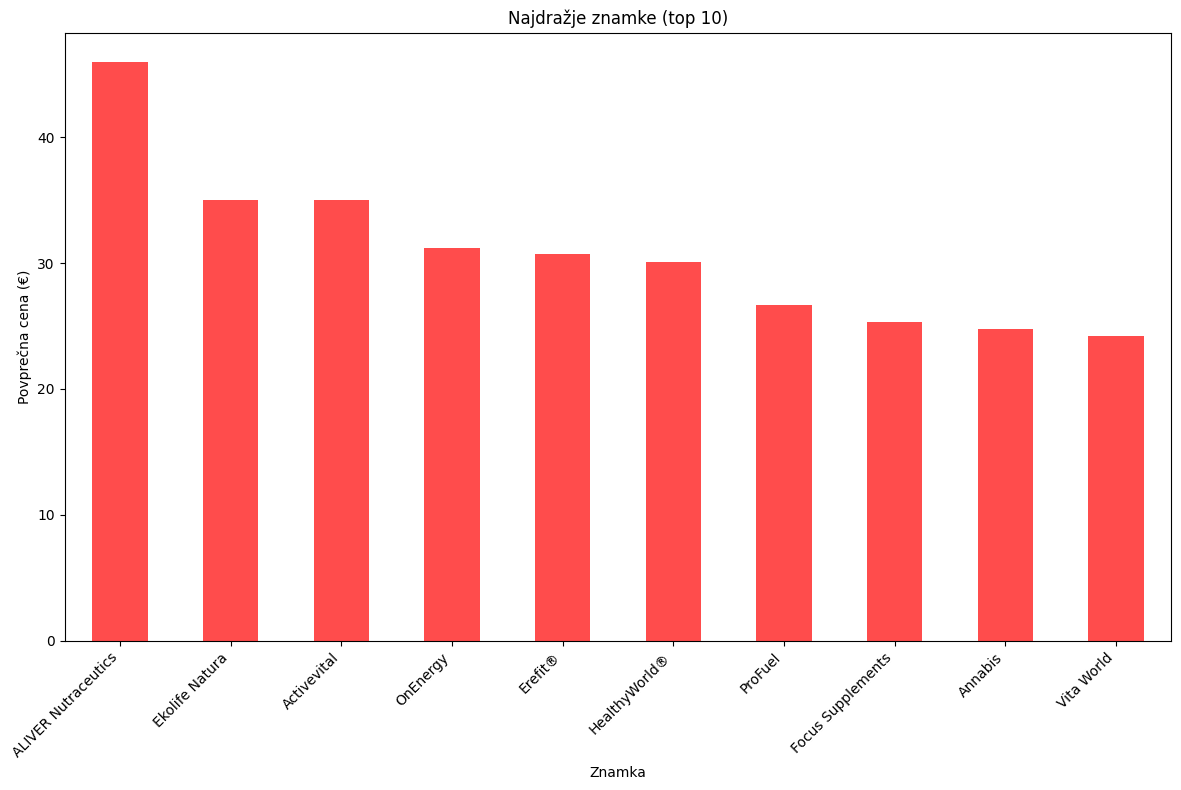

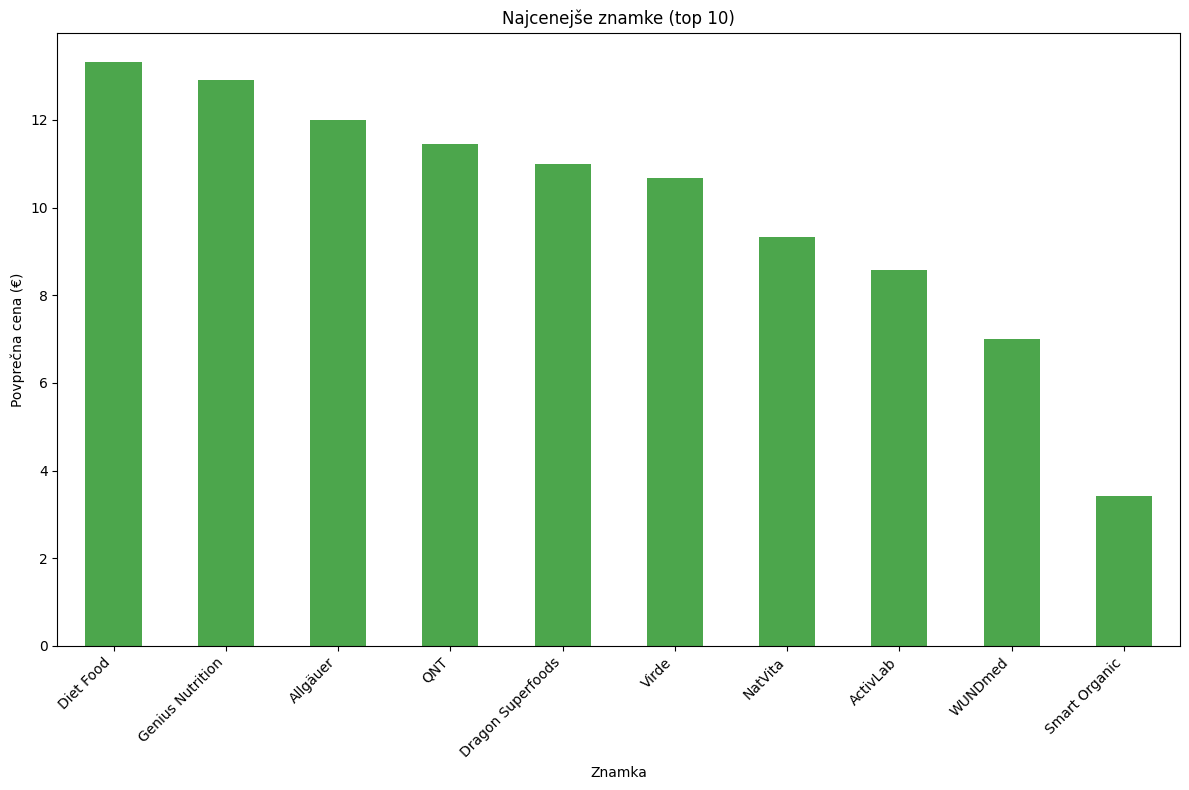

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
def povprecne_cene_po_znamkah():
    # Preberi podatke
    df = pd.read_csv('podatki_o_vseh_izdelki.csv')
    # Odstrani € iz cen in pretvori v številke
    df['Cena'] = df['Cena'].str.replace(' €', '').astype(float)
    # Grupiraj po znamki in izračunaj povprečje
    povprecja = df.groupby('Znamka')['Cena'].mean().round(2).sort_values(ascending=False)
    return povprecja

# Pokliči funkcijo
rezultat = povprecne_cene_po_znamkah()
najdrazji = rezultat.head(10)
najcenejsi = rezultat.tail(10)
print("NAJDRAŽJI PONUDNIKI")
for znamka, cena in najdrazji.items():
    print(f"{znamka}: {cena}€")
print("--------------------------------")
print("NAJCENEJŠI PONUDNIKI")
for znamka, cena in najcenejsi.items():
    print(f"{znamka}: {cena}€")

# Vizualizacija - top 10 najdražjih znamk
plt.figure(figsize=(12, 8))
top_10 = rezultat.head(10)
top_10.plot(kind='bar', color='red', alpha=0.7)
plt.title('Najdražje znamke (top 10)')
plt.xlabel('Znamka')
plt.ylabel('Povprečna cena (€)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Vizualizacija - top 10 najcenejših znamk
plt.figure(figsize=(12, 8))
bottom_10 = rezultat.tail(10)
bottom_10.plot(kind='bar', color='green', alpha=0.7)
plt.title('Najcenejše znamke (top 10)')
plt.xlabel('Znamka')
plt.ylabel('Povprečna cena (€)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
  

Nato sem ponudnike na spletni strani razdelila v tri kategorije glede na povprečno ceno njihovih izdelkov. to sem naredila tako da sem seznam ponudnikov in njihovih povprečnih cen urejenih padajoče razdelila na tri dele in dobila: cenejši, srednji, višji cenovni nivo ponudnikov. not sem med vsemi izdelki preštela koliko jih pripada ponudnikom višjega cenovnega razreda, koliko srednjega in koliko nižjega cenovnega razreda. ko sem imela vse te podatke pa sem izračunala tržni delež posameznega cenovnega razreda ponudnikov in to prikazala v tortnem diagramu. 
Kot se izkaže se tržni deleži na spletni strani restejo glede na višino cenovnega razreda pri čemer ima najnižji cenovni razred najmanjši delež na trgu, srednji srednji delež in pa najvišji cenovni razred največji delež na trgu.

DELEŽI NA TRGU GLEDE NA CENOVNI NIVO PONUDNIKA
Najdražji ponudniki: 41.71%
Srednji ponudniki: 34.88%
Najcenejši ponudniki: 23.41%


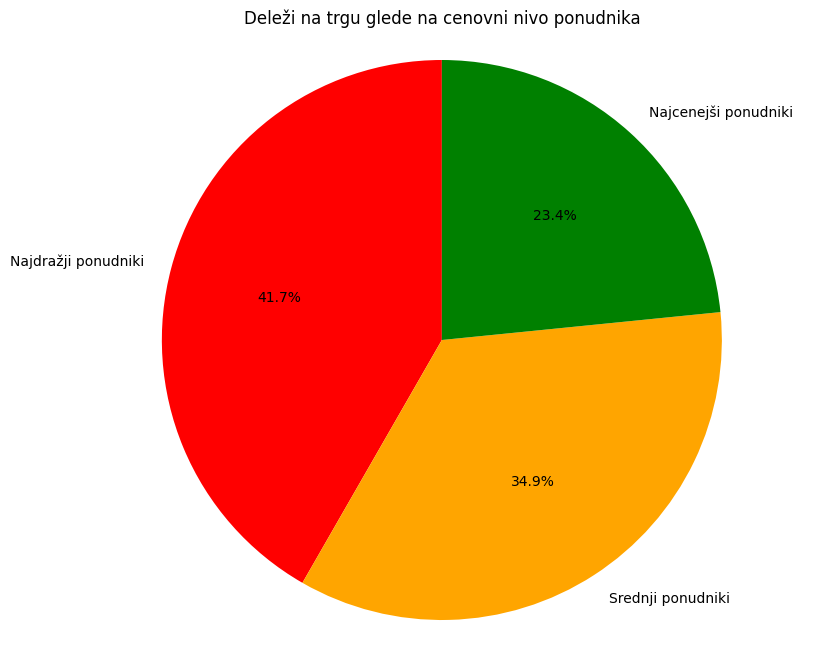

In [2]:
podatki = pd.read_json('podatki_o_vseh_izdelki.json')
število_izdelkov = len(podatki)
število_ponudnikov = len(rezultat)
tretjina = število_ponudnikov // 3
drazji_ponudniki = rezultat[0:tretjina]
srednji_ponudniki = rezultat[tretjina:2*tretjina]
cenejsi_ponudniki = rezultat[2*tretjina:]

št_drazjih = 0
št_srednjih = 0
št_cenejših = 0

for ponudnik, cena in drazji_ponudniki.items():
    št_drazjih += len(podatki[podatki['znamka'] == ponudnik])
for ponudnik, cena in srednji_ponudniki.items():
    št_srednjih += len(podatki[podatki['znamka'] == ponudnik])
for ponudnik, cena in cenejsi_ponudniki.items():
    št_cenejših += len(podatki[podatki['znamka'] == ponudnik])
delezi = [št_drazjih/število_izdelkov, št_srednjih/število_izdelkov, št_cenejših/število_izdelkov]

print("DELEŽI NA TRGU GLEDE NA CENOVNI NIVO PONUDNIKA")
print(f"Najdražji ponudniki: {delezi[0]:.2%}")
print(f"Srednji ponudniki: {delezi[1]:.2%}")
print(f"Najcenejši ponudniki: {delezi[2]:.2%}")

# Tortni diagram
plt.figure(figsize=(10, 8))
kategorije = ['Najdražji ponudniki', 'Srednji ponudniki', 'Najcenejši ponudniki']
barve = ['red', 'orange', 'green']

plt.pie(delezi, labels=kategorije, colors=barve, autopct='%1.1f%%', startangle=90)
plt.title('Deleži na trgu glede na cenovni nivo ponudnika')
plt.axis('equal')  # Da bo torta krožna
plt.show()



Na strani imamo kar nekaj izdelkov ki imajo trenutno popust. Pri naslednjem delu analize sem poiskala nekaj zanimivih podatkov v zvezi s popusti na spletni strani